In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random

# K-means
#### Homework by Pintea Fabian Vladimir
## 1. Preprocessing
### a. Dataset description
The dataset contains information related to champions League of Legends. Attributes include champion names, league, results, side, difficulty, items for spike, attack type, roles (top, mid, jng, sup, bot), and various numerical statistics like kills, deaths, assists, and damage to champions. It contains 300 rows and 17 columns.


In [2]:
dataset_path = 'champions_info.csv'
df = pd.read_csv(dataset_path)
df.head()

,champion,league,result,kills,deaths,assists,side,damagetochampions,Difficulty,Items_For_Spike,Attack_Type,top,mid,jng,sup,bot,first_blood_kill
0,K'Sante,LCK,0,0,3,4,Red,12920,Hard,Defensive,Melee,yes,no,no,no,no,no
1,Jax,LCK,0,1,2,3,Red,15057,Medium,Offensive,Melee,yes,no,no,no,no,no
2,Viego,LCK,0,4,3,3,Blue,10279,Hard,Offensive,Melee,no,no,yes,no,no,no
3,Nautilus,LCK,0,2,6,14,Red,7603,Medium,Support,Melee,no,no,no,yes,no,no
4,Sejuani,LCK,1,0,2,11,Red,8748,Medium,Defensive,Melee,no,no,yes,no,no,no


### b. Data cleaning
The dataset is already clean, there are no missing values, and all the values are numerical or categorical. The only thing that needs to be done is to encode the categorical values.


In [3]:
df.describe()

,result,kills,deaths,assists,damagetochampions
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.506667,2.796667,2.420000,6.173333,14555.590000
std,0.500791,2.606011,1.800297,4.613122,9107.012622
min,0.000000,0.000000,0.000000,0.000000,1327.000000
25%,0.000000,1.000000,1.000000,3.000000,7832.250000
50%,1.000000,2.000000,2.000000,5.000000,12564.500000
75%,1.000000,4.000000,4.000000,8.250000,19273.500000
max,1.000000,12.000000,9.000000,23.000000,50928.000000


### c. Mean and variance for numerical attributes


In [4]:
numerical_attributes = ['result', 'kills', 'deaths', 'assists']
means = df[numerical_attributes].mean()
variances = df[numerical_attributes].var()

print('Mean for numerical attributes: \n', means)
print('Variance for numerical attributes: \n', variances)

Mean for numerical attributes: 
 result     0.506667
kills      2.796667
deaths     2.420000
assists    6.173333
dtype: float64
Variance for numerical attributes: 
 result      0.250792
kills       6.791293
deaths      3.241070
assists    21.280892
dtype: float64


### d. Remove the target attribute in your dataset
In order to keep the dataset more clean and not use really large numbers ( eg. the 'damage to champions' attribute has values in the thousands), I will remove the target attribute from the dataset, as well as the 'result' row.

In [5]:
dataset_final = df.drop(columns=['result', 'damagetochampions'])
dataset_numerical = df[numerical_attributes]

## 2. Distances
### a. Convert the discrete attributes that are not numeric (such as strings or boolean values) into numerical. If this doesn't apply to your dataset, provide a short explanation on how you would proceed

In [6]:
non_numerical_attribues = ['champion', 'league', 'side', 'Difficulty', 'Items_For_Spike', 'Attack_Type', 'side',
                           'top', 'mid', 'jng', 'sup', 'bot', 'first_blood_kill']

label_encoder = LabelEncoder()

# Apply label encoder to each non_numerical attribute
for col in non_numerical_attribues:
    dataset_final[col] = label_encoder.fit_transform(dataset_final[col])

print('Dataset after encoding: \n', dataset_final)
# print columns
print('Columns: \n', dataset_final.columns)

Dataset after encoding: 
      champion  league  kills  deaths  assists  side  Difficulty  \
0          25       0      0       3        4     1           1   
1          22       0      1       2        3     1           2   
2          63       0      4       3        3     0           1   
3          41       0      2       6       14     1           2   
4          51       0      0       2       11     1           2   
..        ...     ...    ...     ...      ...   ...         ...   
295        35       3      3       2        4     1           2   
296        68       3      4       3        4     0           2   
297        25       3      0       3        9     0           1   
298        60       3      2       7        5     1           2   
299        41       3      0       0       13     0           2   

     Items_For_Spike  Attack_Type  top  mid  jng  sup  bot  first_blood_kill  
0                  0            0    1    0    0    0    0                 0  
1          

### b. Write a function distance_points that calculates the distance between two points. The function should take three parameters: the two points and p , where p indicates the order of the Minkowski distance (remember that p=1 is the equivalent for the Manhattan distance, and p=2 for the Euclidean one).

In [7]:
def distance_points(point1, point2, p):
    # Ensure the inputs are array-like
    point1 = np.asarray(point1)
    point2 = np.asarray(point2)

    # Calculate the distance
    dist = np.sum(np.abs(point1 - point2) ** p) ** (1 / p)
    return np.round(dist, 4)


# Example usage
point_a = [1, 2]
point_b = [4, 5]
distance_1 = distance_points(point_a, point_b, 1)  # Manhattan distance
distance_2 = distance_points(point_a, point_b, 2)  # Euclidean distance

print("Manhattan distance:", distance_1)
print("Euclidean distance:", distance_2)

Manhattan distance: 6.0
Euclidean distance: 4.2426


### c. Write a function generate_random_points that generates n d -dimensional points using the uniform distribution. The values should be greater than left_range and lower than right_range .

In [8]:
def generate_random_points(n, d, left_range, right_range):
    points = np.random.uniform(left_range, right_range, (n, d))
    return np.round(points, 4)


# Example usage
n_points = 5  # Number of points
dimensions = 2  # Number of dimensions per point
left = 0  # Left range for uniform distribution
right = 10  # Right range for uniform distribution

random_points = generate_random_points(n_points, dimensions, left, right)
print("Generated random points:\n", random_points)

Generated random points:
 [[8.8769 9.5274]
 [6.761  7.944 ]
 [0.3929 6.2617]
 [0.5554 1.3474]
 [4.4399 4.8036]]


### d. Write a function distance_to_df that calculates the distance between a point X and a dataframe df . The function should return a vector with n values that contains the distance between X and each instance belonging to df ( n represents the number of instances of the dataframe). Hint: Check the norm calculation function from the numpy module

In [9]:
def distance_to_df(X, df, p):
    distances = {}

    for index, row in df.iterrows():
        # print(row)
        # check the norm calculation function from the numpy module
        distances[index] = np.round(np.linalg.norm(X - row, p), 4)
    return distances


for p in range(0, 5):
    print("Distance to point", p, ":", distance_to_df(p, dataset_final, 2))

Distance to point 0 : {0: 25.5539, 1: 22.4722, 2: 63.293, 3: 43.8976, 4: 52.2685, 5: 28.5482, 6: 3.7417, 7: 36.318, 8: 7.6811, 9: 63.0397, 10: 64.6916, 11: 62.3057, 12: 47.2969, 13: 31.607, 14: 30.2985, 15: 56.1694, 16: 65.5286, 17: 8.4261, 18: 11.5758, 19: 62.4179, 20: 12.4499, 21: 51.1566, 22: 7.4162, 23: 54.3691, 24: 23.1948, 25: 49.2138, 26: 62.562, 27: 16.4621, 28: 51.5946, 29: 23.8956, 30: 68.1469, 31: 46.7547, 32: 6.5574, 33: 64.2962, 34: 22.8254, 35: 29.3769, 36: 18.6548, 37: 25.7876, 38: 13.6015, 39: 5.1962, 40: 62.57, 41: 6.7823, 42: 52.0769, 43: 6.3246, 44: 40.3485, 45: 11.7473, 46: 62.3298, 47: 18.1659, 48: 50.1896, 49: 17.2337, 50: 59.7411, 51: 65.169, 52: 31.4643, 53: 45.3321, 54: 44.3396, 55: 64.4903, 56: 50.448, 57: 46.9787, 58: 4.5826, 59: 45.7821, 60: 23.5797, 61: 14.5945, 62: 38.4448, 63: 65.2763, 64: 68.2715, 65: 51.1957, 66: 23.1948, 67: 8.2462, 68: 46.6476, 69: 12.8841, 70: 38.6782, 71: 25.8457, 72: 24.5153, 73: 66.2948, 74: 64.6529, 75: 41.5812, 76: 33.0151, 77: 

## 3. K-means
### a.Write a function distance_to_centroids that calculates the distance between the points from a dataset and a list of centroids. The function will take as parameters the dataframe df and the list of centroids "centroids" and will return a n x m matrix, where n is the number of points from df as m the number of centroids

In [10]:
def distance_to_centroids(df, centroids, p):
    # Empty matrix
    distances_matrix = np.zeros((len(df), len(centroids)))

    # Calc distances
    for i, centroid in enumerate(centroids):
        for j, point in enumerate(df.values):
            distances_matrix[j, i] = np.round(np.linalg.norm(point - centroid, p), 4)

    return distances_matrix


# # Example usage
centroids = generate_random_points(3, 15, 0, 10)
distances_matrix = distance_to_centroids(dataset_final, centroids, 2)
print("Distances matrix:\n", distances_matrix)

Distances matrix:
 [[25.8223 30.6827 29.9821]
 [23.7456 28.5261 28.0981]
 [57.414  62.3201 62.4632]
 [37.291  41.9739 41.75  ]
 [45.9759 51.5811 51.1152]
 [25.0351 29.9967 30.0999]
 [21.6824 23.3246 22.2812]
 [33.393  38.495  38.1172]
 [21.1365 21.5795 20.3939]
 [57.911  63.1291 63.0849]
 [57.283  62.1792 62.8721]
 [56.7673 61.4731 61.628 ]
 [40.5462 46.3262 45.9609]
 [29.3678 34.0072 34.0425]
 [29.3104 34.0857 33.7919]
 [51.278  56.1843 56.0967]
 [58.665  64.1239 64.2788]
 [19.6371 22.9305 21.9958]
 [19.1627 22.5546 21.0231]
 [56.8502 61.3453 61.2506]
 [19.5315 23.31   22.3287]
 [46.7464 51.9028 51.6992]
 [20.3506 22.8734 21.7187]
 [48.9278 53.8174 53.9183]
 [24.9738 29.8877 29.4604]
 [45.2069 49.9601 49.8998]
 [56.3382 61.7581 61.5948]
 [22.3054 25.9225 25.0602]
 [45.9998 51.2965 51.3118]
 [22.555  28.0804 27.8684]
 [62.2331 67.3209 67.1827]
 [42.0116 46.5389 46.3316]
 [21.1189 22.8801 21.5214]
 [58.5796 63.3164 63.3194]
 [23.1113 28.2823 27.9012]
 [26.0273 31.094  30.2059]
 [20.4196

### c. Write a function get_clusters that uses the closest centroid list to create the list of clusters. The function will return a dictionary { index_centroid_1 : [index point for which centroid 1 is the closest]}


In [11]:
def closest_centroid(distances_matrix):
    closest_indices = np.argmin(distances_matrix, axis=1)
    return closest_indices


closest_centroids = closest_centroid(distances_matrix)
print("Closest centroids:\n", closest_centroids)

Closest centroids:
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


### d. Using the list of clusters and the dataframe, write a function update_centroids that will recalculate the centroids as the arithmetic mean of the points from each cluster. The function should return a list with the new coordinates of the centroid.
#### Notes:
1. Treat the case when a cluster is empty, i.e. there is a centroid that is not considered the closest for any of the points from the dataframe.
2. Keep the order of the old indices, meaning the new centroid of the cluster 2 should be the third in the list (assuming the indexing starts with 0).

In [12]:
def update_centroids(df, cluster_assignments, n_clusters):
    new_centroids = np.zeros((n_clusters, df.shape[1]))
    for i in range(n_clusters):
        # Extract points assigned to this cluster
        points_in_cluster = df[cluster_assignments == i]

        # Check if the cluster is empty
        if len(points_in_cluster) == 0:
            # Handle empty cluster, reinitialize randomly within the range of the dataset
            new_centroid = np.random.uniform(df.min(), df.max(), df.shape[1])
        else:
            # Calculate the mean of the points in the cluster
            new_centroid = points_in_cluster.mean().values

        new_centroids[i] = np.round(new_centroid, 4)

    return new_centroids


n_clusters = 2
new_centroids = update_centroids(dataset_final, closest_centroids, n_clusters)
print("New centroids:\n", new_centroids)

New centroids:
 [[38.3439  1.4912  2.8632  2.3123  6.2105  0.5474  1.3263  0.9895  0.5088
   0.1719  0.1649  0.2386  0.1789  0.2456  0.1614]
 [14.9863  0.959   2.2626  6.8232  2.7781  0.7339  1.355   1.0594  0.2805
   0.3378  0.1532  0.4855  0.8267  0.5974  0.5951]]


### e. Write a function that performs the kMeans++ initialisation. The function should take as parameters the dataframe df , the desired number of clusters nclusters and the random seed (for reproducibility) and should return the list of centroids.

In [13]:
def kmeans_plusplus_init(df, n_clusters, random_seed):
    random.seed(random_seed)

    # Initialize centroids list and add the first centroid
    centroids = []
    centroids.append(df.sample().values[0])

    # Calculate the distance to the closest centroid for each point
    distances = distance_to_centroids(df, centroids, 2)
    min_distances = np.min(distances, axis=1)

    # Repeat until we have n_clusters centroids
    while len(centroids) < n_clusters:
        # Choose a random point with a probability proportional to the distance to the closest centroid
        new_centroid = random.choices(df.values, weights=min_distances)[0]
        centroids.append(new_centroid)

        # Calculate the distance to the closest centroid for each point
        distances = distance_to_centroids(df, centroids, 2)
        min_distances = np.min(distances, axis=1)

    return centroids

### f. Write the implementation of the kMeans algorithm. The function should have the following parameters: the dataframe df , the desired number of clusters, the number of iterations, the initalisation type (random or kmeans++) and the random seed.
The function should return a dictionary with the following fields:
- clusters : the membership vector (for each point, the index of the cluster it belongs to)
- centroids : the coordinates of the centroids

In [14]:
def kmeans(df, n_clusters, n_iterations, init_type, random_seed):
    # Intialize centroids
    if init_type == 'random':
        centroids = generate_random_points(n_clusters, df.shape[1], df.min(), df.max())
    elif init_type == 'kmeans++':
        centroids = kmeans_plusplus_init(df, n_clusters, random_seed)
    else:
        raise ValueError("Invalid init_type")

    for _ in range(n_iterations):
        # Calculate distances to centroids and assign clusters
        distances = distance_to_centroids(df, centroids, 2)
        cluster_assignments = closest_centroid(distances)

        # Update centroids
        centroids = update_centroids(df, cluster_assignments, n_clusters)

    return {'clusters': cluster_assignments, 'centroids': centroids}

### g. Write a function that, given a dataframe df , a membership vector mb and the list of centroids , calculates the J score.

In [15]:
def calculate_J(df, cluster_assignments,centroids):
    j_score = 0
    for i, centroid in enumerate(centroids):
        # Points in current cluster
        points_in_cluster = df[cluster_assignments == i]
        # Sum of squared distances of points to their centroid
        j_score += np.sum(np.linalg.norm(points_in_cluster - centroid) ** 2)

    return j_score

# h. Write a function that enables multiple initialisations. Besides the parameters specified at f , you will add the number of initialisations. By multiple initialisation we understand running kmeans multiple times with different random seeds. The function will return the clustering with the best J score. The output will be a dictionary with the fields clusters , centroids and J .

In [16]:
def kmeans_multiple_initializations(df, n_clusters, n_iterations, n_initializations, init_type, random_seed=None):
    best_j_score = np.inf
    best_result = None

    for i in range(n_initializations):
        # Set a new random seed for each initialization
        current_seet = random_seed + i if random_seed is not None else None

        # Run kmeans
        result = kmeans(df, n_clusters, n_iterations, init_type, current_seet)

        # Calculate J score
        j_score = calculate_J(df, result['clusters'], result['centroids'])

        #Update bet result if current J score is lower
        if j_score < best_j_score:
            best_j_score = j_score
            best_result = result
            best_result['J_score'] = j_score

    return best_result

### i. Run the kmeans implementation from h on your dataset with the following parameters: ninit = 100, niter = 30, init = "kmeans++" and nclusters varying from 2 to 30. Plot the evolution of the J score as the number of clusters increases.

Number of Clusters: 2, Best J score: 42002.64871694991
Number of Clusters: 3, Best J score: 24786.007502920016
Number of Clusters: 4, Best J score: 15997.610681470007
Number of Clusters: 5, Best J score: 13120.322855180004
Number of Clusters: 6, Best J score: 11436.186123399999
Number of Clusters: 7, Best J score: 10491.52348127
Number of Clusters: 8, Best J score: 9878.01790739
Number of Clusters: 9, Best J score: 9087.162405739999
Number of Clusters: 10, Best J score: 8658.68719063
Number of Clusters: 11, Best J score: 7926.321273420001
Number of Clusters: 12, Best J score: 8019.826897229999
Number of Clusters: 13, Best J score: 7447.914477650001
Number of Clusters: 14, Best J score: 6827.072704579999
Number of Clusters: 15, Best J score: 6547.180824030001
Number of Clusters: 16, Best J score: 6415.815969740001
Number of Clusters: 17, Best J score: 6343.936453789999
Number of Clusters: 18, Best J score: 6067.43323567
Number of Clusters: 19, Best J score: 5833.805083729999
Number of C

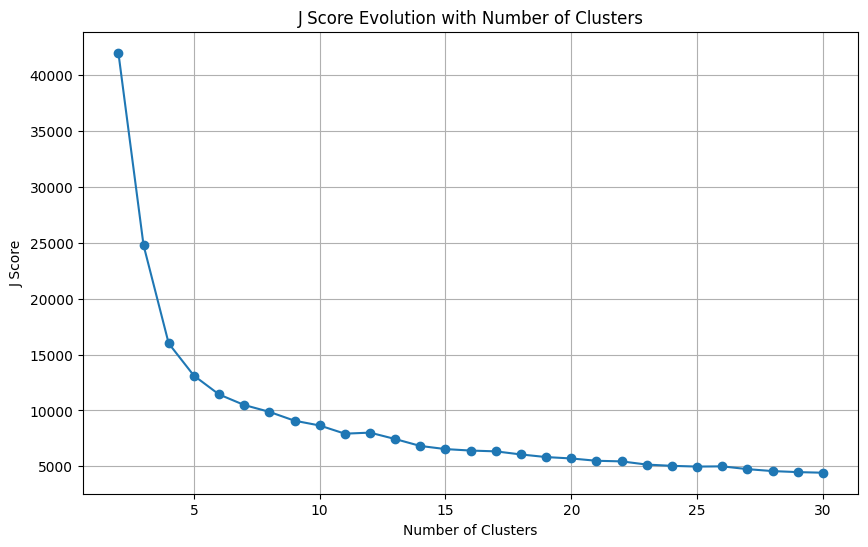

In [17]:
import matplotlib.pyplot as plt
# Parameters
n_iterations = 10
n_initializations = 5
max_clusters = 30
random_seed = 42

# Record the best J scores for different numbers of clusters
j_scores = []

for n_clusters in range(2, max_clusters + 1):
    best_kmeans = kmeans_multiple_initializations(dataset_final, n_clusters, n_iterations, n_initializations, 'kmeans++', random_seed)
    j_scores.append(best_kmeans['J_score'])
    print(f"Number of Clusters: {n_clusters}, Best J score: {best_kmeans['J_score']}")

# Plotting the J scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), j_scores, marker='o')
plt.title("J Score Evolution with Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("J Score")
plt.grid(True)
plt.show()

### What is the natural number of clusters in your case? Justify your reasoning.
Judging by the graph, the natural number of clusters is 5, because after that the J score doesn't decrease as much as it did before. This means that the points are not that different from each other, and they can be grouped in 5 clusters. We can also see that the number of roles in the game is 5 ( Top, Mid, Jungle, Bot and Support ), so this might be another reason why the natural number of clusters is 5.